# Does California Carbon Investment Intensify Green Gentrification? 

PART 4: Gentrified Identification

Haoyu Yue, Department of Urban Design and Planning, University of Washington

## Preparation

In [526]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import Patch

In [620]:
%matplotlib widget
%matplotlib inline

In [528]:
pd.set_option('display.max_columns', None)

## Import the datasets

In [529]:
sf_bg = gpd.read_file('data/sf_bg/sf_bg.geojson')

popu_2015 = pd.read_csv('data/ACS_5Y/population/ACSDT5Y2015.B01003.csv')
popu_2020 = pd.read_csv('data/ACS_5Y/population/ACSDT5Y2020.B01003.csv')

education_2015 = pd.read_csv('data/ACS_5Y/education/ACSDT5Y2015.B15003.csv')
education_2020 = pd.read_csv('data/ACS_5Y/education/ACSDT5Y2020.B15003.csv')

income_2015 = pd.read_csv('data/ACS_5Y/income/ACSDT5Y2015.B19013.csv')
income_2020 = pd.read_csv('data/ACS_5Y/income/ACSDT5Y2020.B19013.csv')

rent_2015 = pd.read_csv('data/ACS_5Y/rent/ACSDT5Y2015.B25064.csv')
rent_2020 = pd.read_csv('data/ACS_5Y/rent/ACSDT5Y2020.B25064.csv')

whiteonly_2015 = pd.read_csv('data/ACS_5Y/whiteonly/ACSDT5Y2015.B02008.csv')
whiteonly_2020 = pd.read_csv('data/ACS_5Y/whiteonly/ACSDT5Y2020.B02008.csv')

In [530]:
popu_2015['geoid'] = popu_2015['id'].str.slice(-12,)
popu_2020['geoid'] = popu_2020['id'].str.slice(-12,)

education_2015['geoid'] = education_2015['id'].str.slice(-12,)
education_2020['geoid'] = education_2020['id'].str.slice(-12,)

income_2015['geoid'] = income_2015['id'].str.slice(-12,)
income_2020['geoid'] = income_2020['id'].str.slice(-12,)

rent_2015['geoid'] = rent_2015['id'].str.slice(-12,)
rent_2020['geoid'] = rent_2020['id'].str.slice(-12,)

whiteonly_2015['geoid'] = whiteonly_2015['id'].str.slice(-12,)
whiteonly_2020['geoid'] = whiteonly_2020['id'].str.slice(-12,)

## Data Preprocessing

In [531]:
sf_bg = sf_bg[['GEOID','area','geometry']]

### Total Population

In [532]:
popu_2015 = popu_2015.iloc[:,[0,4]]
popu_2020 = popu_2020.iloc[:,[0,4]]

In [533]:
popu_2015.columns = ['popu_2015','GEOID']
popu_2020.columns = ['popu_2020','GEOID']

### Mean Education Years

In [534]:
education_2015 = education_2015.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,52]]
education_2020 = education_2020.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,52]]

In [535]:
edu_table = education_2015.copy()
edu_mean = (edu_table.iloc[:,4] * 1 + edu_table.iloc[:,5] * 2 + edu_table.iloc[:,6] * 3 + edu_table.iloc[:,7] * 4 + edu_table.iloc[:,8] * 5 +edu_table.iloc[:,9] * 6 + edu_table.iloc[:,10] * 7 + edu_table.iloc[:,11] * 8 + edu_table.iloc[:,12] * 9 + edu_table.iloc[:,13] * 10 + edu_table.iloc[:,14] * 11 + edu_table.iloc[:,15] * 12 + edu_table.iloc[:,16] * 12 + edu_table.iloc[:,17] * 12 + edu_table.iloc[:,18] * 13 + edu_table.iloc[:,19] * 15 + edu_table.iloc[:,20] * 15 + edu_table.iloc[:,21] * 16 + edu_table.iloc[:,22] * 18 + edu_table.iloc[:,23] * 20 + edu_table.iloc[:,24] * 22) / edu_table.iloc[:,0]
edu_attain_2015 = pd.concat([edu_table.iloc[:,-1], edu_mean], axis=1)
edu_attain_2015.columns = ['GEOID','edu_2015']

edu_table = education_2020.copy()
edu_mean = (edu_table.iloc[:,4] * 1 + edu_table.iloc[:,5] * 2 + edu_table.iloc[:,6] * 3 + edu_table.iloc[:,7] * 4 + edu_table.iloc[:,8] * 5 +edu_table.iloc[:,9] * 6 + edu_table.iloc[:,10] * 7 + edu_table.iloc[:,11] * 8 + edu_table.iloc[:,12] * 9 + edu_table.iloc[:,13] * 10 + edu_table.iloc[:,14] * 11 + edu_table.iloc[:,15] * 12 + edu_table.iloc[:,16] * 12 + edu_table.iloc[:,17] * 12 + edu_table.iloc[:,18] * 13 + edu_table.iloc[:,19] * 15 + edu_table.iloc[:,20] * 15 + edu_table.iloc[:,21] * 16 + edu_table.iloc[:,22] * 18 + edu_table.iloc[:,23] * 20 + edu_table.iloc[:,24] * 22) / edu_table.iloc[:,0]
edu_attain_2020 = pd.concat([edu_table.iloc[:,-1], edu_mean], axis=1)
edu_attain_2020.columns = ['GEOID','edu_2020']

### Median income

In [536]:
income_2015 = income_2015.iloc[:,[0,4]]
income_2020 = income_2020.iloc[:,[0,4]]

income_2015.columns = ['Median HH Income (in 2015 dollars)','GEOID']
income_2020.columns = ['Median HH Income (in 2020 dollars)','GEOID']

In [537]:
str = ["250,000+",'-']
num = [300000,np.nan]
for replace_str,replace_num in zip(str,num):
    replace_index = income_2015[income_2015['Median HH Income (in 2015 dollars)'] == replace_str].index
    income_2015.iloc[replace_index,0] = replace_num
income_2015['Median HH Income (in 2015 dollars)'] = income_2015['Median HH Income (in 2015 dollars)'].astype('float')

str = ["250,000+",'-','2,500-']
num = [300000,np.nan,2000]
for replace_str,replace_num in zip(str,num):
    replace_index = income_2020[income_2020['Median HH Income (in 2020 dollars)'] == replace_str].index
    income_2020.iloc[replace_index,0] = replace_num
income_2020['Median HH Income (in 2020 dollars)'] = income_2020['Median HH Income (in 2020 dollars)'].astype('float')  * 1.08 #inflation

### Rent

In [538]:
rent_2015 = rent_2015.iloc[:,[0,4]]
rent_2020 = rent_2020.iloc[:,[0,4]]

rent_2015.columns = ['Median Gross Rent 2015','GEOID']
rent_2020.columns = ['Median Gross Rent 2020','GEOID']

In [539]:
str = ["3,500+",'-']
num = [4000,np.nan]
for replace_str,replace_num in zip(str,num):
    replace_index = rent_2020[rent_2020['Median Gross Rent 2020'] == replace_str].index
    rent_2020.iloc[replace_index,0] = replace_num
rent_2020['Median Gross Rent 2020'] = rent_2020['Median Gross Rent 2020'].astype('float')

str = ["3,500+",'-','100-']
num = [4000,np.nan,'0']
for replace_str,replace_num in zip(str,num):
    replace_index = rent_2015[rent_2015['Median Gross Rent 2015'] == replace_str].index
    rent_2015.iloc[replace_index,0] = replace_num
rent_2015['Median Gross Rent 2015'] = rent_2015['Median Gross Rent 2015'].astype('float') * 1.08

### White Only

In [540]:
whiterate_2015 = whiteonly_2015.iloc[:,[0,4]]
whiterate_2015.columns = ['white_15','GEOID']

In [541]:
whiterate_2020 = whiteonly_2020.iloc[:,[0,4]]
whiterate_2020.columns = ['white_20','GEOID']

### Merge All

In [542]:
sf_demo_2015 = sf_bg.merge(popu_2015,how='left',on='GEOID').merge(edu_attain_2015,how='left',on='GEOID').merge(income_2015,how='left',on='GEOID').merge(rent_2015,how='left',on='GEOID').merge(whiterate_2015,how='left',on='GEOID')
sf_demo_2020 = sf_bg.merge(popu_2020,how='left',on='GEOID').merge(edu_attain_2020,how='left',on='GEOID').merge(income_2020,how='left',on='GEOID').merge(rent_2020,how='left',on='GEOID').merge(whiterate_2020,how='left',on='GEOID')

# Mismatch of block groups

We can see that here are some 2020 geoid cannot be matched to 2015. So we need to import the census block group 2020 to get the mean values of each missing block group.

In [543]:
cbg_2020 = gpd.read_file('data/tl_2020_06_bg/tl_2020_06_bg.shp')
cbg_2020 = cbg_2020.to_crs('EPSG:3857')

sf_boundary = gpd.read_file('data/sf_boundaries.gpkg')
sf_boundary = sf_boundary.to_crs('EPSG:3857')

In [544]:
ca_demo_2020_base = cbg_2020.merge(
    popu_2020,how='left',on='GEOID').merge(
        edu_attain_2020,how='left',on='GEOID').merge(
            income_2020,how='left',on='GEOID').merge(
                rent_2020,how='left',on='GEOID').merge(
                    whiterate_2020,how='left',on='GEOID') #merge them


In [545]:
sf_demo_2020_base = ca_demo_2020_base.clip(sf_boundary)
#remove some nonsense shapes
sf_demo_2020_base = sf_demo_2020_base[(sf_demo_2020_base.geometry.type != 'LineString')&(sf_demo_2020_base.geometry.type != 'GeometryCollection')&(sf_demo_2020_base.geometry.type != 'Point')]

In [546]:
sf_demo_2020_na = sf_demo_2020[sf_demo_2020.popu_2020.isnull()] #filter the NA rows

In [547]:
sf_demo_2020_empty = pd.DataFrame(columns=sf_demo_2020_na.columns)

for i in range(0,len(sf_demo_2020_na)):
    sf_demo_na_i = sf_demo_2020_na.iloc[i:i+1]
    inter_result = sf_demo_2020_base.overlay(sf_demo_na_i,how='intersection')

    groupby_sum = inter_result.groupby('GEOID_2')[['popu_2020_1']].mean()
    groupby_mean = inter_result.groupby('GEOID_2')[['edu_2020_1','Median HH Income (in 2020 dollars)_1','Median Gross Rent 2020_1','white_20_1']].mean()

    sf_demo_na_i_full = sf_demo_na_i[['GEOID','area','geometry']].merge(groupby_sum,left_on='GEOID', right_index = True).merge(groupby_mean, left_on='GEOID', right_index = True)
    sf_demo_na_i_full.columns = sf_demo_2020_empty.columns
    sf_demo_2020_empty = sf_demo_2020_empty.append(sf_demo_na_i_full)

/Users/haoyu/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:2196: UserWarning:

`keep_geom_type=True` in overlay resulted in 6 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries

/var/folders/d4/7ds8vgb91y50k8cnmmtxccjr0000gn/T/ipykernel_54191/1199087348.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/haoyu/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:2196: UserWarning:

`keep_geom_type=True` in overlay resulted in 7 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries

/var/folders/d4/7ds8vgb91y50k8cnmmtxccjr0000gn/T/ipykernel_54191/1199087348.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/haoyu/opt/anaconda3/lib/python3.9

In [548]:
sf_demo_2020_all = sf_demo_2020[~sf_demo_2020.popu_2020.isnull()].append(sf_demo_2020_empty)

/var/folders/d4/7ds8vgb91y50k8cnmmtxccjr0000gn/T/ipykernel_54191/1575476781.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [549]:
sf_demo = sf_demo_2015.merge(sf_demo_2020_all,on='GEOID')

In [550]:
sf_demo = sf_demo[['GEOID', 'area_x', 'geometry_x', 'popu_2015', 'edu_2015',
       'Median HH Income (in 2015 dollars)', 'Median Gross Rent 2015',
       'white_15', 'popu_2020', 'edu_2020',
       'Median HH Income (in 2020 dollars)', 'Median Gross Rent 2020',
       'white_20']]
sf_demo.columns = ['GEOID', 'area', 'geometry', 'popu_2015', 'edu_2015',
       'Median HH Income (in 2015 dollars)', 'Median Gross Rent 2015',
       'white_15', 'popu_2020', 'edu_2020',
       'Median HH Income (in 2020 dollars)', 'Median Gross Rent 2020',
       'white_20']

In [551]:
sf_demo = gpd.GeoDataFrame(sf_demo, crs="EPSG:3857", geometry=sf_demo.geometry)

In [553]:
sf_demo

,GEOID,area,geometry,popu_2015,edu_2015,Median HH Income (in 2015 dollars),Median Gross Rent 2015,white_15,popu_2020,edu_2020,Median HH Income (in 2020 dollars),Median Gross Rent 2020,white_20
0,060750452002,1.871457e+05,"POLYGON ((-13632869.903 4547990.267, -13632749...",1550,15.565567,66875.0,1414.80,802,1943.0,16.251908,130594.68,2510.0,1370.0
1,060750164001,3.005107e+05,"POLYGON ((-13629569.614 4547980.690, -13629386...",2355,14.971482,100833.0,1868.40,1959,1956.0,15.817239,190650.24,2579.0,1677.0
2,060750477021,1.884071e+05,"POLYGON ((-13635264.942 4547852.104, -13635146...",1422,14.784832,54674.0,1617.84,584,950.0,14.657761,142061.04,1548.0,424.0
3,060750479013,2.516901e+05,"POLYGON ((-13637188.876 4548004.773, -13637069...",1392,14.104061,61333.0,1265.76,908,2185.0,13.583117,140441.04,2946.0,956.0
4,060750451002,1.759849e+05,"POLYGON ((-13632512.233 4548010.970, -13632392...",1525,15.281025,132820.0,1960.20,1055,1522.0,16.011391,200788.2,2330.0,1062.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,060014058002,1.931100e+05,"POLYGON ((-13607124.710 4550198.865, -13607109...",1195,11.760719,55313.0,1217.16,195,1502.0,10.549372,57881.52,1333.0,319.0
2916,060014033001,1.340623e+06,"POLYGON ((-13611454.927 4550088.565, -13611443...",2440,15.936747,77375.0,2166.48,1335,831.2,14.886056,139513.104,2194.0,402.4
2917,060750113002,8.266409e+04,"POLYGON ((-13626545.286 4550476.240, -13626525...",1395,10.511054,26081.0,623.16,347,1115.0,10.531311,19575.0,686.0,405.0
2918,060750112001,7.836443e+04,"POLYGON ((-13627136.281 4550381.151, -13627117...",1378,14.039708,64063.0,1407.24,716,1151.0,15.568773,111713.04,1971.0,685.0


# Choose the gentrified region by using thresholds

In [554]:
rent_increase_rate = (sf_demo['Median Gross Rent 2020']/sf_demo['Median Gross Rent 2015']).mean()
edu_increase_rate = (sf_demo['edu_2020']/sf_demo['edu_2015']).mean()
income_increase_rate = (sf_demo['Median HH Income (in 2020 dollars)']/sf_demo['Median HH Income (in 2015 dollars)']).mean()

In [557]:
rent_increase_rate

1.285612021093621

### Income Below 40% in 2015

In [559]:
income_threshold_2015 = sf_demo.sort_values('Median HH Income (in 2015 dollars)').iloc[int(0.4*len(sf_demo)):int(0.4*len(sf_demo)+1),5]

In [560]:
lowerincome_15_index = sf_demo[sf_demo['Median HH Income (in 2015 dollars)'] < income_threshold_2015.values[0]].index

### Edu or income increase from 2015 to 2020

In [561]:
high_edu_increaes_index = sf_demo[(sf_demo['edu_2020']/sf_demo['edu_2015']) > edu_increase_rate].index

In [562]:
high_income_increaes_index = sf_demo[(sf_demo['Median HH Income (in 2020 dollars)']/sf_demo['Median HH Income (in 2015 dollars)']) > income_increase_rate].index

### Rent Increase from 2015 to 2020

In [563]:
high_rent_increaes_index = sf_demo[(sf_demo['Median Gross Rent 2020']/sf_demo['Median Gross Rent 2015']) > rent_increase_rate].index

### All three requirements

In [564]:
gentrified_index = ((high_edu_increaes_index | high_income_increaes_index) & high_rent_increaes_index) & lowerincome_15_index

/var/folders/d4/7ds8vgb91y50k8cnmmtxccjr0000gn/T/ipykernel_54191/311261757.py:1: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.

/var/folders/d4/7ds8vgb91y50k8cnmmtxccjr0000gn/T/ipykernel_54191/311261757.py:1: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.



In [565]:
sf_gentrified = sf_demo.iloc[gentrified_index]

In [566]:
sf_gentrified

,GEOID,area,geometry,popu_2015,edu_2015,Median HH Income (in 2015 dollars),Median Gross Rent 2015,white_15,popu_2020,edu_2020,Median HH Income (in 2020 dollars),Median Gross Rent 2020,white_20
0,060750452002,187145.689267,"POLYGON ((-13632869.903 4547990.267, -13632749...",1550,15.565567,66875.0,1414.80,802,1943.0,16.251908,130594.68,2510.0,1370.0
3,060750479013,251690.139309,"POLYGON ((-13637188.876 4548004.773, -13637069...",1392,14.104061,61333.0,1265.76,908,2185.0,13.583117,140441.04,2946.0,956.0
6,060750476003,209279.793757,"POLYGON ((-13634192.267 4547914.073, -13634073...",1032,14.755297,73848.0,2363.04,590,1447.0,15.070805,183891.6,4000.0,858.0
19,060750477012,195058.411359,"POLYGON ((-13634580.772 4548438.428, -13634461...",1471,13.194159,60795.0,1383.48,478,1851.0,15.084758,95715.0,1780.0,866.0
30,060750476001,224204.644956,"POLYGON ((-13634328.299 4548451.667, -13634234...",1661,14.262887,66689.0,1818.72,889,1340.0,15.595883,98550.0,2403.0,701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,060750119012,49468.625106,"POLYGON ((-13627142.626 4549853.318, -13627087...",1534,15.807799,55179.0,1730.16,913,364.0,16.49226,166418.28,2835.0,337.0
2902,060750119022,75544.750673,"POLYGON ((-13626809.447 4550044.755, -13626741...",763,14.375731,71750.0,1215.00,506,1378.0,15.959111,99000.36,1892.0,1020.0
2907,060014059021,320632.620197,"POLYGON ((-13607903.613 4550322.267, -13607883...",1614,9.570167,28203.0,1013.04,179,1559.0,11.791783,53925.48,1551.0,280.0
2914,060750118001,90734.196966,"POLYGON ((-13626317.637 4550385.096, -13626264...",1622,9.842311,20478.0,645.84,173,1590.0,12.220947,40137.12,888.0,197.0


In [567]:
#add the density restriction
sf_gentrified_plot = sf_gentrified.copy()
sf_gentrified_plot['density'] = (sf_gentrified.popu_2015/sf_gentrified.area)
sf_gentrified_density = sf_gentrified_plot[sf_gentrified_plot['density']>0.0001]

<AxesSubplot:>

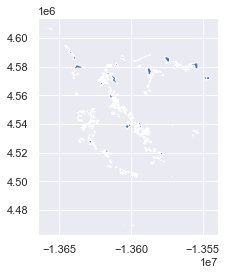

In [621]:
sf_gentrified_density.plot()

# Cluster

In [613]:
cluster_data = sf_gentrified_density.copy()
cluster_data = cluster_data[['popu_2015', 'edu_2015',
       'Median HH Income (in 2015 dollars)', 'Median Gross Rent 2015',
       'white_15', 'popu_2020', 'edu_2020',
       'Median HH Income (in 2020 dollars)', 'Median Gross Rent 2020',
       'white_20', 'density']]

In [614]:
cluster_data['white_rate'] = (cluster_data['white_20']/cluster_data['popu_2020'])/(cluster_data['white_15']/cluster_data['popu_2015'])
cluster_data['rent_rate'] = cluster_data['Median Gross Rent 2020']/cluster_data['Median Gross Rent 2015']
cluster_data['income_rate'] = cluster_data['Median HH Income (in 2020 dollars)']/cluster_data['Median HH Income (in 2015 dollars)']
cluster_data['popu_rate'] = cluster_data['popu_2020']/cluster_data['popu_2015']
cluster_data['edu_rate'] = cluster_data['edu_2020']/cluster_data['edu_2015']

In [615]:
cluster_data

,popu_2015,edu_2015,Median HH Income (in 2015 dollars),Median Gross Rent 2015,white_15,popu_2020,edu_2020,Median HH Income (in 2020 dollars),Median Gross Rent 2020,white_20,density,white_rate,rent_rate,income_rate,popu_rate,edu_rate
0,1550,15.565567,66875.0,1414.80,802,1943.0,16.251908,130594.68,2510.0,1370.0,0.008282,1.362715,1.774102,1.952818,1.253548,1.044094
3,1392,14.104061,61333.0,1265.76,908,2185.0,13.583117,140441.04,2946.0,956.0,0.005531,0.670749,2.327455,2.289812,1.569684,0.963064
6,1032,14.755297,73848.0,2363.04,590,1447.0,15.070805,183891.6,4000.0,858.0,0.004931,1.037162,1.692735,2.490136,1.402132,1.021383
19,1471,13.194159,60795.0,1383.48,478,1851.0,15.084758,95715.0,1780.0,866.0,0.007541,1.43978,1.286611,1.574389,1.258328,1.143291
30,1661,14.262887,66689.0,1818.72,889,1340.0,15.595883,98550.0,2403.0,701.0,0.007408,0.97742,1.321259,1.477755,0.806743,1.093459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1534,15.807799,55179.0,1730.16,913,364.0,16.49226,166418.28,2835.0,337.0,0.031010,1.555547,1.638577,3.015971,0.237288,1.043299
2902,763,14.375731,71750.0,1215.00,506,1378.0,15.959111,99000.36,1892.0,1020.0,0.010100,1.116156,1.557202,1.379796,1.806029,1.110143
2907,1614,9.570167,28203.0,1013.04,179,1559.0,11.791783,53925.48,1551.0,280.0,0.005034,1.619431,1.531035,1.912048,0.965923,1.23214
2914,1622,9.842311,20478.0,645.84,173,1590.0,12.220947,40137.12,888.0,197.0,0.017876,1.161646,1.374954,1.960012,0.980271,1.241675


In [616]:
normalized_list = ['rent_rate', 'white_rate','income_rate','popu_rate','edu_rate']
Normalized_data = cluster_data[normalized_list]

In [617]:
for i in normalized_list:
    Normalized_data[i] = Normalized_data[i].astype(float)
    Normalized_data[i] = (Normalized_data[i] - np.mean(Normalized_data[i]))/np.std(Normalized_data[i])

/var/folders/d4/7ds8vgb91y50k8cnmmtxccjr0000gn/T/ipykernel_54191/1909393674.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d4/7ds8vgb91y50k8cnmmtxccjr0000gn/T/ipykernel_54191/1909393674.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [627]:
cluster_data = Normalized_data.dropna()

In [628]:
cluster_data = cluster_data[['rent_rate','income_rate','edu_rate','white_rate']]

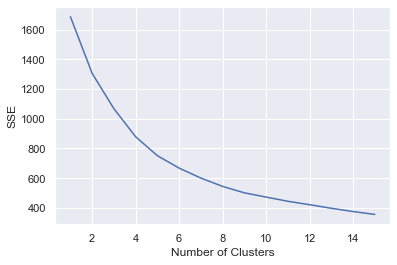

In [629]:
import matplotlib.pyplot as plt
from sklearn import cluster

SSE = []
for k in range(1,16):
    k_means = cluster.KMeans(n_clusters=k,random_state=5)
    k_means.fit(cluster_data)
    SSE.append(k_means.inertia_)

plt.plot(range(1,16), SSE)

plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.show()

In [329]:
#fit the clustering
k_means = cluster.KMeans(n_clusters=6, max_iter=50, random_state=5)
k_means.fit(cluster_data) 

KMeans(max_iter=50, n_clusters=6, random_state=5)

In [414]:
# print the centroids of all clusters
dfCenters = pd.DataFrame(data=k_means.cluster_centers_, columns=normalized_list)
ClusterName = ['Pattern A', 'Pattern B', 'Pattern C', 'Pattern D','Pattern E','Pattern F'] 
  
dfCenters['ClusterName'] = ClusterName
dfCenters

,rent_rate,white_rate,income_rate,popu_rate,edu_rate,ClusterName
0,-0.143908,-0.283950,0.037047,0.706434,-0.932199,Pattern A
1,-0.323710,-0.118201,-0.365413,0.037718,0.890072,Pattern B
2,2.694985,0.151821,2.298729,0.006260,1.053856,Pattern C
3,0.712865,5.177536,-0.097647,0.032918,0.360903,Pattern D
4,0.123839,0.039448,0.099187,8.523064,-0.405694,Pattern E
5,-0.084135,-0.047093,-0.068651,-0.566925,-0.295732,Pattern F


In [417]:
#using heatmap to visualize the clustering results
import plotly
import plotly.graph_objs as go
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
heatmap = min_max_scaler.fit_transform(k_means.cluster_centers_)

heatmap = pd.DataFrame(data=heatmap, columns=normalized_list) 
heatmap['ClusterName'] = ClusterName

data = [go.Heatmap(z=heatmap.values.tolist(), 
                   y=ClusterName,
                   x=normalized_list,
                   colorscale='inferno')]

plotly.offline.iplot(data, filename='pandas-heatmap')

In [394]:
dfCenters_vis = dfCenters.copy().set_index('ClusterName')

In [408]:
dfCenters_vis.columns = ['Rent', 'White Rate', 'Income', 'Population', 'Education']

ValueError: could not convert string to float: 'Pattern A'

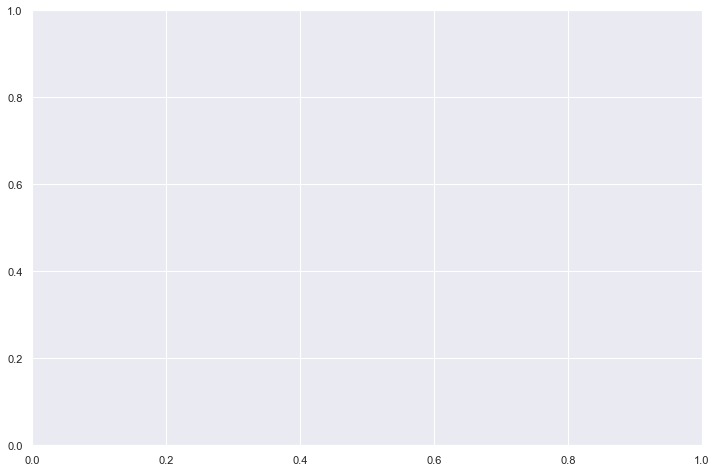

In [412]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

f,ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(heatmap)

In [332]:
cluster_data["pattern"] = k_means.labels_
cluster_data

/var/folders/d4/7ds8vgb91y50k8cnmmtxccjr0000gn/T/ipykernel_54191/1772804252.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rent_rate,white_rate,income_rate,popu_rate,edu_rate,pattern
0,0.567050,0.570907,-0.027176,0.482921,-0.191871,0
3,1.926992,-0.606301,0.414069,1.201938,-1.164504,0
6,0.367078,0.017059,0.676365,0.820858,-0.464480,0
17,0.084716,0.732254,0.957477,-0.104457,0.079117,5
19,-0.631028,0.702014,-0.522672,0.493791,0.998837,1
...,...,...,...,...,...,...
2901,-0.386378,-0.300458,-0.749617,0.958187,-0.274568,0
2902,0.033987,0.151448,-0.777464,1.739479,0.600946,1
2907,-0.030321,1.007645,-0.080558,-0.171251,2.065336,1
2914,-0.413913,0.228838,-0.017756,-0.138618,2.179786,1


In [333]:
sf_cluster = sf_bg.merge(cluster_data,left_index=True,right_index=True,how='left')
sf_cluster.pattern.value_counts()

5.0    246
1.0    180
0.0    145
2.0     34
3.0     13
4.0      3
Name: pattern, dtype: int64

# Descriptive Statistics

In [581]:
sf_demo['gentrified'] = 0

In [583]:
sf_demo.iloc[sf_gentrified_density.index,-1] = 1

In [588]:
sf_demo['gentrified'].value_counts()

0    2493
1     427
Name: gentrified, dtype: int64

In [589]:
sf_demo

,GEOID,area,geometry,popu_2015,edu_2015,Median HH Income (in 2015 dollars),Median Gross Rent 2015,white_15,popu_2020,edu_2020,Median HH Income (in 2020 dollars),Median Gross Rent 2020,white_20,gentrified
0,060750452002,1.871457e+05,"POLYGON ((-13632869.903 4547990.267, -13632749...",1550,15.565567,66875.0,1414.80,802,1943.0,16.251908,130594.68,2510.0,1370.0,1
1,060750164001,3.005107e+05,"POLYGON ((-13629569.614 4547980.690, -13629386...",2355,14.971482,100833.0,1868.40,1959,1956.0,15.817239,190650.24,2579.0,1677.0,0
2,060750477021,1.884071e+05,"POLYGON ((-13635264.942 4547852.104, -13635146...",1422,14.784832,54674.0,1617.84,584,950.0,14.657761,142061.04,1548.0,424.0,0
3,060750479013,2.516901e+05,"POLYGON ((-13637188.876 4548004.773, -13637069...",1392,14.104061,61333.0,1265.76,908,2185.0,13.583117,140441.04,2946.0,956.0,1
4,060750451002,1.759849e+05,"POLYGON ((-13632512.233 4548010.970, -13632392...",1525,15.281025,132820.0,1960.20,1055,1522.0,16.011391,200788.2,2330.0,1062.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,060014058002,1.931100e+05,"POLYGON ((-13607124.710 4550198.865, -13607109...",1195,11.760719,55313.0,1217.16,195,1502.0,10.549372,57881.52,1333.0,319.0,0
2916,060014033001,1.340623e+06,"POLYGON ((-13611454.927 4550088.565, -13611443...",2440,15.936747,77375.0,2166.48,1335,831.2,14.886056,139513.104,2194.0,402.4,0
2917,060750113002,8.266409e+04,"POLYGON ((-13626545.286 4550476.240, -13626525...",1395,10.511054,26081.0,623.16,347,1115.0,10.531311,19575.0,686.0,405.0,0
2918,060750112001,7.836443e+04,"POLYGON ((-13627136.281 4550381.151, -13627117...",1378,14.039708,64063.0,1407.24,716,1151.0,15.568773,111713.04,1971.0,685.0,1


In [593]:
sf_demo['popu_2020'] = sf_demo['popu_2020'].replace(0,1)
sf_demo['popu_2015'] = sf_demo['popu_2015'].replace(0,1)

In [594]:
sf_demo['white_rate_20'] = (sf_demo['white_20']/sf_demo['popu_2020'])
sf_demo['white_rate_15'] = sf_demo['white_15']/sf_demo['popu_2015']

In [611]:
sf_demo['white_rate_20'] = sf_demo['white_rate_20'].astype('float')

In [612]:
sf_demo.groupby('gentrified').mean()

,area,popu_2015,edu_2015,Median HH Income (in 2015 dollars),Median Gross Rent 2015,white_15,popu_2020,edu_2020,Median HH Income (in 2020 dollars),Median Gross Rent 2020,white_20,white_rate_20,white_rate_15
gentrified,,,,,,,,,,,,,
0,4.130731e+06,1555.638187,14.678230,100040.201496,1912.432563,917.231849,1471.123302,14.870292,142070.189333,2262.071455,822.905636,0.572842,0.608184
1,7.585465e+05,1594.405152,13.063357,50870.384075,1314.724215,784.288056,1563.427225,13.898217,102375.340557,2039.613583,712.061988,0.471745,0.496179


In [597]:
cluster_data['white_rate'] = (cluster_data['white_20']/cluster_data['popu_2020'])/(cluster_data['white_15']/cluster_data['popu_2015'])
cluster_data['rent_rate'] = cluster_data['Median Gross Rent 2020']/cluster_data['Median Gross Rent 2015']
cluster_data['income_rate'] = cluster_data['Median HH Income (in 2020 dollars)']/cluster_data['Median HH Income (in 2015 dollars)']
cluster_data['popu_rate'] = cluster_data['popu_2020']/cluster_data['popu_2015']
cluster_data['edu_rate'] = cluster_data['edu_2020']/cluster_data['edu_2015']

# Gentrification Visualization

In [475]:
sf_demo_gen = sf_demo.copy()
sf_demo_gen['gentrified'] = np.nan

In [476]:
sf_demo_gen.loc[list(sf_gentrified_density.index),'gentrified'] = 'Gentrified'
sf_demo_gen.gentrified = sf_demo_gen.gentrified.fillna('Non-Gentrified')

In [477]:
sf_demo_gen_pattern = sf_demo_gen.merge(cluster_data[['pattern']],how='left',left_index=True,right_index=True)
pattern_colors = {0:"Pattern A",1:'Pattern B',2:'Pattern C',3:'Pattern D',4:'Pattern E',5:'Pattern F'}
colors = ["#AE4E4F",'#795F4F','#FFD37A','#579592','#94B059','#23192B']
sf_demo_gen_pattern['color'] = sf_demo_gen_pattern['pattern']
sf_demo_gen_pattern = sf_demo_gen_pattern.replace({"color": pattern_colors})

(-13703630.309558578, -13513243.912907619, 4445534.86688099, 4633443.056948153)

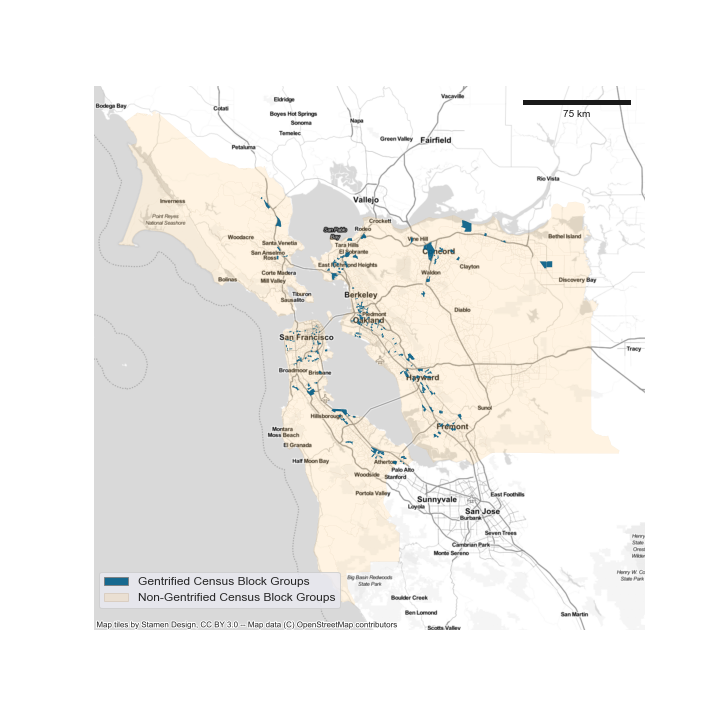

In [491]:
f,ax=plt.subplots(figsize=(10,10))
sf_demo_gen_pattern.plot(ax=ax,edgecolor='#A3814E',linewidth=0.1,legend=True,alpha=0.2,facecolor='#FFC66E')
sf_gentrified_density.plot(ax=ax,facecolor='#005B85',alpha=0.9,linewidth=0)
ctx.add_basemap(ax=ax, crs=sf_bg.crs, source=ctx.providers.Stamen.TonerLite)
ax.add_artist(ScaleBar(2.0,box_alpha=0,border_pad=1))

legend_elements = [Patch(facecolor='#005B85', alpha=0.9,edgecolor='gray',label='Gentrified Census Block Groups'),
                    Patch(edgecolor='#A3814E',alpha=0.2,facecolor='#FFC66E',label='Non-Gentrified Census Block Groups')]
ax.legend(handles=legend_elements, loc=[0.01,0.04],fontsize=12)
plt.axis('off')

(-13703630.309558578, -13513243.912907619, 4445534.86688099, 4633443.056948153)

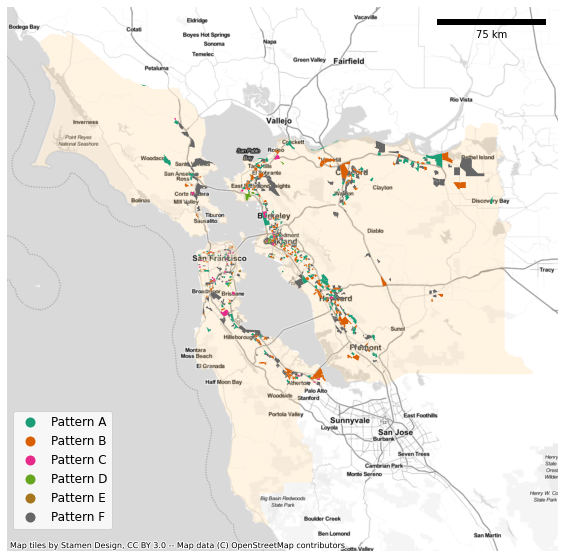

In [370]:
f,ax=plt.subplots(figsize=(10,10))
sf_demo_gen_pattern.plot(ax=ax,edgecolor='white',linewidth=0.4,alpha=0.2,facecolor='#FFC66E')
sf_demo_gen_pattern.plot(ax=ax,column='color',linewidth=0.4,alpha=1,legend=True,categorical=True,cmap='Dark2',legend_kwds={'loc': [0.01,0.04],'fontsize':12})
ctx.add_basemap(ax=ax, crs=sf_bg.crs, source=ctx.providers.Stamen.TonerLite)
ax.add_artist(ScaleBar(2.0,box_alpha=0,border_pad=1))
plt.axis('off')

In [374]:
sf_demo_gen_pattern.to_file('data/regression/sf_demo_gen_pattern.geojson', driver='GeoJSON')

/Users/haoyu/opt/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

